In [7]:
#importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [26]:
#importar um CSV em um Dataframe
df = pd.read_csv("base_mongodb.csv")

In [27]:
df.head(10)

,Titulo,Reclamação,Status,Data,Localidade
0,Mudança de plano,Boa noite ! Há mais ou menos 2 meses atrás ti...,Não respondida,29/10/2019,São João da Boa Vista
1,Serviço Técnico nao realizado,#vivoSai do trabalho as 15:30.Perdi um períod...,Não respondida,29/10/2019,São Paulo
2,Cobrança indevida,"Solicitei a devolução do valor de R$39,99 ref...",Não respondida,29/10/2019,Não identificado
3,Estou sendo explorado e furtado pelo VIVO,No mês de junho meu plano expirou-se em menos...,Não respondida,29/10/2019,Pirapora do Bom Jesus
4,"Internet instável, sinal horrível, vive caindo",A muito tempo a internet de casa vive caindo ...,Não respondida,29/10/2019,São Paulo
5,NOME NEGATIVADO INDEVIDAMENTE,Me chamo Camila e recentemente fiz uma consul...,Não respondida,29/10/2019,São Caetano do Sul
6,"DESCASO, MENTIRA E DESORGANIZAÇÃO","ME CHAMO ANDRESA BASILIO,DESCASO, MENTIRA E D...",Não respondida,29/10/2019,São Paulo
7,Pagamento efetuado e nao registrado,No dia 09/10 fiz o pagamento de 3 debitos rel...,Não respondida,29/10/2019,Goiânia
8,dedução indevida de diárias Vivo Easy,"Primeiramente gostaria de dizer que, a idéia ...",Não respondida,29/10/2019,Itapevi
9,Devolução,Fui na loja da vivo fui atendido pela atenden...,Não respondida,29/10/2019,São Paulo


In [28]:
df.dtypes

Titulo        object
Reclamação    object
Status        object
Data          object
Localidade    object
dtype: object

In [29]:
df.Reclamação.describe()

count                                                  1080
unique                                                  981
top        Já entrei em contato várias vezes solicitando...
freq                                                      4
Name: Reclamação, dtype: object

In [30]:
#separei apenas a séries de Reclamações
reclamacao = df['Reclamação']

In [31]:
display(reclamacao.iloc[100])

' A vivo ligou para a casa da minha tia, que é uma pessoa idosa, informando que haviam solicitado o cancelamento de sua ... '

In [32]:
#Concatenar as palavras
all_reclamacoes = " ".join(sentenca for sentenca in reclamacao)

In [33]:
#Ver quantidade de palavras
print(f"Quantidade: {len(all_reclamacoes)}")

Quantidade: 129753


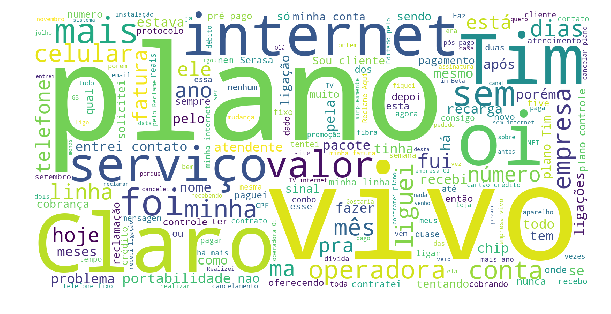

In [42]:
#lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(["uma", "tenho", "fiz", "desde", "pois", "por", "um", "da", "meu", "já", "os", "o", "em", "de", "ao", "a", "as", "no", "na", "boa", "bom", "dia", "noite", "tarde", "não", "que", "para", "quando", "estou", "eu"])

#gerar a wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white",
                     width=1600, height=800).generate(all_reclamacoes)

#mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("nuvem_palavras_reclameaqui.jpeg")